## 🕹️ 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
##### [프로그램 분석]
- 순환 신경망에 대해 알아보겠습니다.

In [6]:
# 먼저 훈련데이터와 테스트 데이터를 불러오겠습니다.
# 우리가 num_words를 300으로 지정했는데, 영화 리뷰 데이터들의 모든 토큰들을 숫자로 바꾸었을때 가장 높은 값부터 순서대로 300개의 데이터만 사용하겠다는 의미입니다.
# 그럼 300개의 순위 안에 들어가지 못한 단어는 어떡할까요?
# 모두 숫자 2로 표시되게 됩니다.
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

In [7]:
# 훈련데이터와 테스트데이터는 각각 2만 5천개의 데이터로 이루어져있습니다.
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [8]:
# train_input의 첫번째 값은 어떤 문자들로 이루어져있는지는 모르겠지만, 218개의 토큰(단어)로 이루어져있습니다.
# i am a boy가 예시 문장이라면, i를 0, am을 2, a를 9, boy를 33과 같이 임의의 숫자로 명명하여 하나의 리스트로 작성합니다.
len(train_input[0])

218

In [9]:
# 두번째 데이터는 189개의 토큰으로 이루어져있군요.
len(train_input[1])

189

In [10]:
# 첫번째 데이터를 보면, 글자가 아닌 숫자로 배열되어있는 것을 볼 수 있습니다.
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [11]:
# 긍정적인지, 부정적인지를 반환하겠죠?
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [12]:
# 그런 다음, 검증 데이터를 나눠봅시다.
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                   train_target,
                                                                   test_size=0.2,
                                                                   random_state=42)

In [13]:
# 훈련데이터의 모든 단어의 개수를 한번 볼까요?
import numpy as np
length = np.array([len(x) for x in train_input])

In [14]:
# 평균이 239, 중앙값이 178로 평균 > 중앙값의 형태를 띄기 때문에 왼쪽으로 치우치고 왜도가 양수인 그래프가 나올것 같군요.
print(np.mean(length), np.median(length))

239.00925 178.0


(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

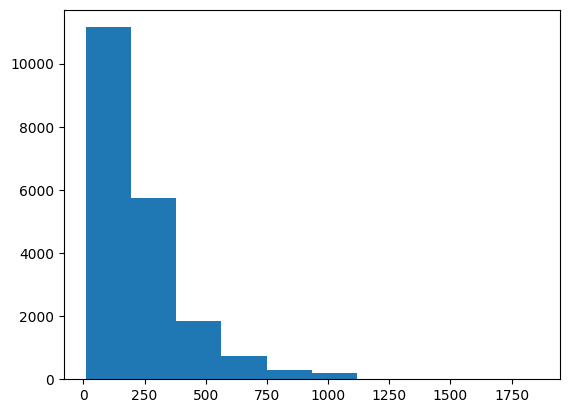

In [15]:
# 한번 그림을 그려봅시다.
import matplotlib.pyplot as plt
plt.hist(length)

In [16]:
# pad_sequences 함수는 데이터에 패딩을 하는데, maxlen의 값에 따라서 더 큰 값들은 앞부분의 데이터를 잘라내고, 작은 부분들은 앞부분에 0을 집어넣어서
# 100개의 길이를 맞추어줍니다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100, truncating='pre')

In [17]:
train_seq.shape

(20000, 100)

In [18]:
# 그렇다면 왜 패딩을 진행할때, 앞부분의 값을 다룰까요?
# 일반적으로 중요한 말은 뒤쪽에 하는 편이기 때문에 앞쪽에 있는 문장의 중요성 > 뒤쪽에 있는 문장의 중요성으로 판단합니다
# 그래서 기왕 줄일거면 앞쪽의 데이터를 줄이는거죠.

In [19]:
# 100개의 데이터로 줄어든 모습을 볼 수 있죠.
train_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [20]:
# 앞부분의 데이터가 사라졌죠?
train_input[0][:10]

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141]

In [21]:
# 뒷부분의 데이터는 그대론데요.
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]

In [22]:
# 그렇다면 6번째 문장을 볼까요?
# 앞부분에 0이 존재하네요? 그럼 이 문장은 100개의 토큰 이하로 이루어져있어서 아마도 0을 추가로 집어넣은 것 같군요.
# truncating의 값을 pre로 지정하거나, post로 지정해서 앞쪽/뒷쪽의 방향을 바꿀수는 있지만, 주로 앞쪽을 사용합니다.
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94, 205,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [30]:
# 미리 검증데이터도 바꾸어둡시다.
val_seq = pad_sequences(sequences=val_input,
                        maxlen=100,
                        truncating='pre')

In [31]:
# 우리가 아는 것처럼 딥러닝 모델을 구축해보죠.
# RNN의 경우 SimpleRNN을 사용해보겠습니다.
from tensorflow import keras
model = keras.Sequential()
# 여기서 input_shape를 왜 100, 300으로 한걸까요?
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [32]:
# 분명, 2만개의 데이터가 있고, 각각의 데이터는 100개의 리스트를 같는데 말이죠.
train_seq.shape

(20000, 100)

In [33]:
# 만약, 우리가 각각의 토큰의 값을 70, 88 처럼 숫자로 받아들이게되면 어떤 현상이 일어날까요?
# 기본적으로 딥러닝은 숫자가 크면 클수록 해당 모델에 많은 영향이 미친다고 생각합니다.
# 하지만, 20번째 토큰과 30번째 토큰 중 어떤 단어가 더 중요한지 판단할 수 있을까요?
# 그래서 우리는 각각의 토큰(단어)를 표현할 때, 앞서 300개의 단어만을 사용한다고 했죠?
# 각 토큰의 값을 300개의 데이터 중 20번이다 라고 한다면 20번째만 1로 지정을 한 후에 나머지 부분을 0으로 지정해 100, 300의 형태의 모양을 유지합니다.
# 이러한 방법은 원-핫 인코딩이라고 하죠.
# 케라스에서는 to_categorical 함수를 통해서 해당 데이터를 바로 원-핫 인코딩을 진행할 수 있습니다.
train_oh = keras.utils.to_categorical(train_seq, num_classes=300)
print(train_oh.shape)

(20000, 100, 300)


In [34]:
# 첫번째 데이터의 첫번째 토큰을 보면, 하나의 값만 1이죠?
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [36]:
# 검증데이터도 똑같이 만들어줍시다.
val_oh = keras.utils.to_categorical(val_seq)

In [37]:
# 해당 모델은 이렇게 생겼군요.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 컴파일을 해줄텐데, learning_rate의 값을 0.001에서 0.0000로 조정합시다.
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
earlystopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [39]:
# 이제 학습을 시켜보죠.
history = model.fit(train_oh,
                    train_target,
                    validation_data=(val_oh, val_target),
                    epochs=100,
                    batch_size=64,
                    callbacks=[earlystopping])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5024 - loss: 0.7008 - val_accuracy: 0.5230 - val_loss: 0.6946
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5342 - loss: 0.6911 - val_accuracy: 0.5602 - val_loss: 0.6855
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5729 - loss: 0.6819 - val_accuracy: 0.5882 - val_loss: 0.6773
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5966 - loss: 0.6731 - val_accuracy: 0.6138 - val_loss: 0.6660
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6281 - loss: 0.6597 - val_accuracy: 0.6350 - val_loss: 0.6539
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6418 - loss: 0.6507 - val_accuracy: 0.6562 - val_loss: 0.6409
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6673 - loss: 0.6341 - val_accuracy: 0.6778 - val_loss: 0.6259
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6835 - loss: 0.6179 - val_acc

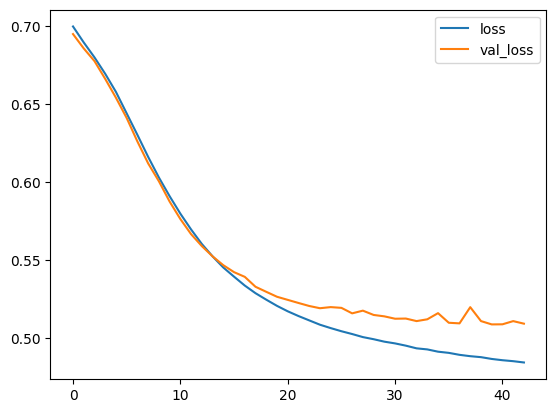

In [40]:
# 77%정도면 나쁘지 않지만, 손실 그래프를 그려볼게요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [41]:
# 이번에는 용량을 봤는데, 확실히 원-핫 인코딩으로 인하여 데이터 용량이 늘어났군요.
print(train_seq.nbytes, train_oh.nbytes)

8000000 4800000000


In [42]:
# 이번에는 임베딩 방법을 적용시켜봅시다. 원-핫 인코딩처럼 크기가 크게 만드는 것이 아니라, 각 토큰을 소수점으로 나타내죠.
# input_length가 100인 이유는 각 데이터의 크기가 100이기 때문입니다.
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# 똑같이 컴파일을 진행하고,
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
# 훈련을 시켜보죠.
earlystopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq,
                    train_target,
                    epochs=100,
                    batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[earlystopping])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5121 - loss: 0.6965 - val_accuracy: 0.5108 - val_loss: 0.6946
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5233 - loss: 0.6911 - val_accuracy: 0.5272 - val_loss: 0.6909
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5448 - loss: 0.6869 - val_accuracy: 0.5438 - val_loss: 0.6866
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5704 - loss: 0.6816 - val_accuracy: 0.5708 - val_loss: 0.6802
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6017 - loss: 0.6718 - val_accuracy: 0.6736 - val_loss: 0.6171
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6849 - loss: 0.6059 - val_accuracy: 0.6926 - val_loss: 0.5966
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7123 - loss: 0.5808 - val_accuracy: 0.7112 - val_loss: 0.5749
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7320 - loss: 0.5589 - val_accu

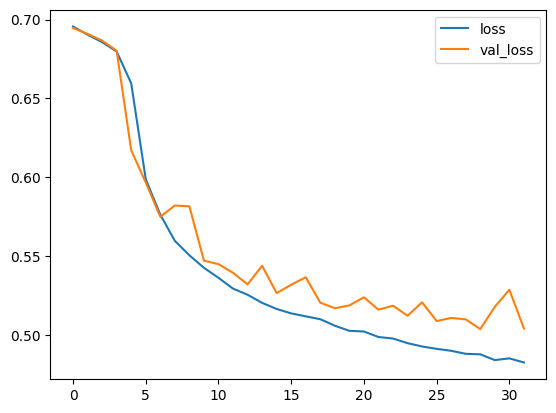

In [47]:
# 손실함수 그래프를 그려보죠.
# 비슷한 결과임에도 용량은 많이 줄어든 것을 알 수 있습니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()